In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import autogluon.core as ag
from autogluon.vision import ObjectDetector

In [3]:
url = '~/tiny_motorbike/'
dataset_train = ObjectDetector.Dataset.from_voc(url, splits='trainval')
#print(dataset_train)

In [4]:
time_limit = 60*30  # at most 0.5 hour
detector = ObjectDetector()
hyperparameters = {'epochs': 5, 'batch_size': 8}
hyperparamter_tune_kwargs={'num_trials': 2}
detector.fit(dataset_train, time_limit=time_limit, hyperparameters=hyperparameters, hyperparamter_tune_kwargs=hyperparamter_tune_kwargs)

INFO:gluoncv.auto.tasks.object_detection:No GPU detected/allowed, using most conservative search space.
INFO:gluoncv.auto.tasks.object_detection:Randomly split train_data into train[153]/validation[17] splits.
INFO:gluoncv.auto.tasks.object_detection:Starting fit without HPO
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != ()
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.epochs    20 != 5
INFO:SSDEstimator:root.train.early_stop_patience -1 != 10
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.seed      233 != 296
INFO:SSDEstimator:root.train.batch_size 16 != 8
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.ssd.transfer    ssd_512_resnet50_v1_coco != ssd_512_mobilenet1.0_coco
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root

100%|██████████| 82589/82589 [00:02<00:00, 37708.27KB/s]
INFO:SSDEstimator:Start training from [Epoch 0]
INFO:SSDEstimator:[Epoch 0] Training cost: 43.332668, CrossEntropy=3.701028, SmoothL1=1.235109
INFO:SSDEstimator:[Epoch 0] Validation: 
boat=1.0000000000000002
cow=0.6418181818181818
dog=0.20000000000000004
pottedplant=0.0
chair=1.0000000000000002
bicycle=0.3914728682170542
bus=0.7727272727272727
person=0.7861956279765532
car=0.6921668812477241
motorbike=0.7287387852076892
mAP=0.6213119617194475
INFO:SSDEstimator:[Epoch 0] Current best map: 0.621312 vs previous 0.000000, saved to /home/jupyter/machine-learning-playground/02.autogluon/01.quick_start/e95515fa/.trial_0/best_checkpoint.pkl
INFO:SSDEstimator:[Epoch 1] Training cost: 42.670327, CrossEntropy=2.667492, SmoothL1=1.318905
INFO:SSDEstimator:[Epoch 1] Validation: 
boat=1.0000000000000002
cow=0.6363636363636365
dog=0.0
pottedplant=0.0
chair=0.11111111111111108
bicycle=0.40714558169103626
bus=0.6666666666666667
person=0.716218914

In [5]:
dataset_test = ObjectDetector.Dataset.from_voc(url, splits='test')

test_map = detector.evaluate(dataset_test)

In [6]:
print(test_map)

(['boat', 'cow', 'dog', 'pottedplant', 'chair', 'bicycle', 'bus', 'person', 'car', 'motorbike', 'mAP'], [0.0, nan, 0.009090909090909092, 0.0, 0.0962566844919786, nan, nan, nan, nan, nan, 0.026336898395721925])


In [7]:
print("mAP on test dataset: {}".format(test_map[1][-1]))

mAP on test dataset: 0.026336898395721925


In [8]:
image_path = dataset_test.iloc[0]['image']
result = detector.predict(image_path)
print(result)

   predict_class  predict_score  \
0         person       0.972545   
1      motorbike       0.656974   
2        bicycle       0.413718   
3        bicycle       0.386425   
4            car       0.385629   
..           ...            ...   
83           car       0.035549   
84        person       0.035515   
85        person       0.035410   
86        person       0.034698   
87       bicycle       0.034663   

                                         predict_rois  
0   {'xmin': 0.3991624116897583, 'ymin': 0.2802912...  
1   {'xmin': 0.3347971439361572, 'ymin': 0.4365810...  
2   {'xmin': 0.3935226500034332, 'ymin': 0.4864529...  
3   {'xmin': 0.3239029049873352, 'ymin': 0.5058030...  
4   {'xmin': 0.0012714447220787406, 'ymin': 0.6388...  
..                                                ...  
83  {'xmin': 0.7013959288597107, 'ymin': 0.1555381...  
84  {'xmin': 0.46275612711906433, 'ymin': 0.285793...  
85  {'xmin': 0.38480135798454285, 'ymin': 0.438172...  
86  {'xmin': 0.8661

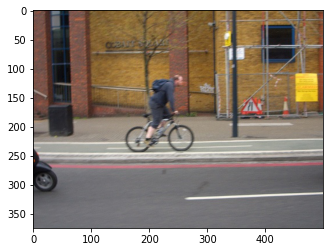

In [9]:
image0 = plt.imread(image_path)
plt.imshow(image0)

In [10]:
import cv2
image0 = cv2.imread(image_path)
good_result = result.query('predict_score >= 0.7')
good_result.head()

,predict_class,predict_score,predict_rois
0,person,0.972545,"{'xmin': 0.3991624116897583, 'ymin': 0.2802912..."


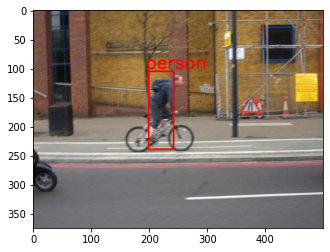

In [11]:
height, width = image0.shape[0:2]
for index, row in good_result.iterrows():
    rois, class_name = row['predict_rois'], row['predict_class']
    
    x1, y1 = int(rois['xmin']* width), int(rois['ymin']* height)
    x2, y2 = int(rois['xmax']* width), int(rois['ymax']* height)
    
    cv2.rectangle(image0, (x1, y1), (x2, y2), (0, 0, 255), thickness=2)
    cv2.putText(image0, class_name, (x1-5, y1-5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 255), thickness=2)

image0_RGB = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
plt.imshow(image0_RGB)

In [26]:
image0_path = dataset_test.iloc[0]['image']
result = detector.predict(image0_path).query('predict_score >= 0.7')

In [27]:
import numpy as np
from PIL import Image

im0 = Image.open(image0_path)
width, height = im0.size
image0 = np.array(im0)

bboxes=[]
for rois in result['predict_rois']:
    x1, y1 = int(rois['xmin']* width), int(rois['ymin']* height)
    x2, y2 = int(rois['xmax']* width), int(rois['ymax']* height)
    bboxes.append([x1, y1, x2, y2])
    
bboxes = np.array(bboxes)

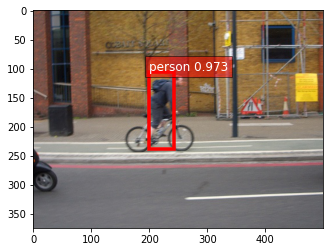

In [28]:
from gluoncv.utils import viz

ax = viz.plot_bbox(image0, bboxes=bboxes, 
                   scores=result['predict_score'].values, 
                   class_names=result['predict_class'].values)
plt.show()

In [29]:
bulk_result = detector.predict(dataset_test)
print(bulk_result)

     predict_class  predict_score  \
0           person       0.972545   
1        motorbike       0.656974   
2          bicycle       0.413718   
3          bicycle       0.386425   
4              car       0.385629   
...            ...            ...   
4592           car       0.034896   
4593        person       0.034784   
4594        person       0.034718   
4595        person       0.034599   
4596        person       0.034501   

                                           predict_rois  \
0     {'xmin': 0.3991624116897583, 'ymin': 0.2802912...   
1     {'xmin': 0.3347971439361572, 'ymin': 0.4365810...   
2     {'xmin': 0.3935226500034332, 'ymin': 0.4864529...   
3     {'xmin': 0.3239029049873352, 'ymin': 0.5058030...   
4     {'xmin': 0.0012714447220787406, 'ymin': 0.6388...   
...                                                 ...   
4592  {'xmin': 0.28345438838005066, 'ymin': 0.081359...   
4593  {'xmin': 0.3063782751560211, 'ymin': 0.2001586...   
4594  {'xmin': 0.3799304

In [30]:
savefile = 'detector.ag'
detector.save(savefile)
new_detector = ObjectDetector.load(savefile)

/home/jupyter/.local/lib/python3.7/site-packages/mxnet/gluon/block.py:1591: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


# Change fit parameters

In [3]:
import autogluon.core as ag
from autogluon.vision import ObjectDetector

url = '~/tiny_motorbike/'
dataset_train = ObjectDetector.Dataset.from_voc(url, splits='trainval')
detector = ObjectDetector()

## medium_quality_faster_train

In [4]:
from autogluon.core import Categorical, Real

time_limit = 2*3600
hyperparameters = { 'transfer': Categorical('ssd_512_resnet50_v1_coco'), 
                   'lr': 0.01, 'batch_size': Categorical(8, 16),
                   'epochs': 30, 'early_stop_patience': 5}
hyperparamter_tune_kwargs={ 'num_trials': 16, 'search_strategy': 'random'}

detector.fit(dataset_train, time_limit=time_limit, 
             hyperparameters=hyperparameters, 
             hyperparamter_tune_kwargs=hyperparamter_tune_kwargs)

INFO:gluoncv.auto.tasks.object_detection:No GPU detected/allowed, using most conservative search space.
INFO:gluoncv.auto.tasks.object_detection:Randomly split train_data into train[158]/validation[12] splits.
INFO:gluoncv.auto.tasks.object_detection:Starting fit without HPO
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:root.valid.batch_size 16 != 8
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != ()
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.train.early_stop_patience -1 != 5
INFO:SSDEstimator:root.train.seed      233 != 697
INFO:SSDEstimator:root.train.lr        0.001 != 0.01
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.batch_size 16 != 8
INFO:SSDEstimator:root.train.epochs    20 != 30
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
IN

INFO:SSDEstimator:[Epoch 17] Training cost: 142.243345, CrossEntropy=3.499857, SmoothL1=2.607167
INFO:SSDEstimator:[Epoch 17] Validation: 
chair=0.0
dog=0.0
bicycle=0.0
person=0.12662737069731225
motorbike=0.3149329979862513
bus=0.0
cow=0.0
boat=0.0
pottedplant=0.0
car=0.0
mAP=0.044156036868356355
INFO:SSDEstimator:[Epoch 18] Training cost: 142.190210, CrossEntropy=3.637817, SmoothL1=2.623801
INFO:SSDEstimator:[Epoch 18] Validation: 
chair=0.0
dog=0.0
bicycle=0.0
person=0.11871100877659677
motorbike=0.3643957105650337
bus=0.0
cow=0.0
boat=0.0
pottedplant=0.0
car=0.0
mAP=0.04831067193416305
INFO:SSDEstimator:[Epoch 18] Current best map: 0.048311 vs previous 0.047567, saved to /home/jupyter/machine-learning-playground/02.autogluon/01.quick_start/1906b374/.trial_0/best_checkpoint.pkl
INFO:SSDEstimator:[Epoch 19] Training cost: 149.018086, CrossEntropy=3.480067, SmoothL1=2.658755
INFO:SSDEstimator:[Epoch 19] Validation: 
chair=0.0
dog=0.0
bicycle=0.0
person=0.11941278224102427
motorbike=0.

In [5]:
dataset_test = ObjectDetector.Dataset.from_voc(url, splits='test')

test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][-1]))

mAP on test dataset: 0.03505976114877539


In [6]:
savefile = 'detector.medium_quality_faster_train.ag'
detector.save(savefile)

## medium_quality_faster_inference

In [ ]:
from autogluon.core import Categorical, Real

time_limit =4*3600
hyperparameters = {
                        'transfer': Categorical('center_net_resnet18_v1b_coco', 'yolo3_mobilenet1.0_coco'),
                        'lr': Categorical(0.01, 0.005, 0.001), 'batch_size': Categorical(32, 64, 128),
                        'epochs': Categorical(30, 50), 'early_stop_patience': 10 }
hyperparamter_tune_kwargs={ 'num_trials': 32, 'search_strategy': 'bayesopt'}

detector.fit(dataset_train, time_limit=time_limit, 
             hyperparameters=hyperparameters, 
             hyperparamter_tune_kwargs=hyperparamter_tune_kwargs)

In [ ]:
dataset_test = ObjectDetector.Dataset.from_voc(url, splits='test')

test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][-1]))

In [ ]:
savefile = 'detector.medium_quality_faster_inference.ag'
detector.save(savefile)